#  Viz Notebook 

data: from https://zenodo.org/record/4060432#.X5ySHHhKgWo


Thesis: identify humans (voice), animals, instruments, water, door, car, explosion (boom, thunder)

3 Main CNN Models:

Spectrograms
MFCC Image Analysis
Mean-MFCC Coefficient Analysis

mfccs_processed = np.mean(mfcc.T, axis=0)
print(mfccs_processed)

To do items:

Update:
1. model on image analysis of Mel Frequency Spectrogram (images)
2. model on analysis of coefficients of MFCC (unless it ends up making sense to analyze the image as well)


- create new columns of labels I will use (tags too long and many)

- extract MFCC of all files to add to dataframe

- consider need to trim audio files to make same length, OR adding length to short files (padding them?)

In [4]:
import pandas as pd
import numpy as np
import time
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
# from PIL import Image
# import skimage
# import skimage.io
# import os
# import pickle
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.utils import to_categorical
# from keras import optimizers

%matplotlib inline

In [11]:
dev_info = pd.read_json('data/labelled_dev_info.json')
#dev_info = dev_info.T

In [16]:
dev_info.shape
dev_info.head()

,title,description,tags,license,uploader,track_num,wav_name,png_name,labels
63,RalfHutterWorking.wav,"Ralf Hutter from Kraftwerk saying ""Working on ...","[male, voice]",http://creativecommons.org/licenses/by/3.0/,fectoper,63,63.wav,63.png,0
136,keyboard-rhymtic.wav,Noise of an average logitech keyboard. Pretty ...,"[keyboard, rhythmic, tap, type]",http://creativecommons.org/licenses/by/3.0/,Anton,136,136.wav,136.png,11
137,keyboard-typing.wav,Noise of an average logitech keyboard. Pretty ...,"[computer, environmental-sounds-research, key,...",http://creativecommons.org/licenses/by/3.0/,Anton,137,137.wav,137.png,8
221,bell.wav,simple *ting* sound,[bell],http://creativecommons.org/publicdomain/zero/1.0/,Erratic,221,221.wav,221.png,5
236,BUSSES.aiff,Departing busses\r\n at Utrecht Central Railwa...,"[bus, depart, drive, station]",http://creativecommons.org/licenses/by-nc/3.0/,hanstimm,236,236.wav,236.png,7


In [7]:
#eval_info = pd.read_json('data/FSD50K.metadata/eval_clips_info_FSD50K.json').T


## EDA

## padding audio (pad/trim to 5 seconds) and Displaying Spectrogram

In [30]:
audio_dir = '/Users/Mateo/Springboard/FSD50k/data/FSD50K.dev_audio/'
list_of_wav_names = dev_info.wav_name.to_list()

In [31]:
# Lets play the audio 

file_path = audio_dir + list_of_file_names[0]
data, sr = librosa.load(file_path)

ipd.Audio(file_path)

## Spectrogram

0.12012004852294922
110250


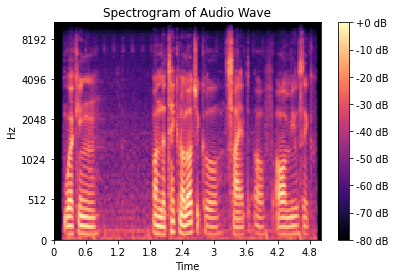

In [28]:
# # Padding/Visualizing One File
start = time.time()

file_path = audio_dir + list_of_wav_names[0]
data, sr = librosa.load(file_path, res_type = 'kaiser_fast') # almost 3 times faster than default: 'kaiser_best'

#padding with random offset for shorter tracks

input_length = 5 * 22050 # 5 seconds * 22050 samples per second (the sample_rate)

if len(data) > input_length:
    data = data[:input_length]

elif input_length > len(data):
    max_offset = input_length - len(data)
    offset = np.random.randint(max_offset)
    data = np.pad(data, (offset, input_length - len(data) - offset), "constant")


# Fast Fourier Transform, a window for the results image
n_fft = 2048
# hop length slides the window (4:1 something er other?)
hop_length = 512
# converts audio spectrum into 128 evenly spaced groups based on human hearing
n_mels = 128

S = librosa.feature.melspectrogram(data, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram of Audio Wave')

end = time.time()

print(end - start)
print(len(data))

In [14]:
# Lets play the audio 
ipd.Audio(file_path)

In [58]:
print('shape of spectrogram matrix:', S_DB.shape)

shape of spectrogram matrix: (128, 216)


### MFCC Spectrogram


0.06889081001281738


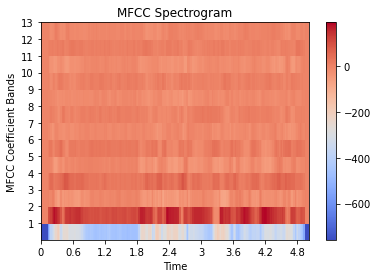

In [25]:
#making a MFCC list (to add later to df)

start = time.time()

file_path = audio_dir + list_of_wav_names[0]
data, sr = librosa.load(file_path, res_type = 'kaiser_fast')

#padding/trimming to 5 seconds with random offset for shorter tracks

input_length = 5 * 22050

if len(data) > input_length:
    data = data[:input_length]

elif input_length > len(data):
    max_offset = input_length - len(data)
    offset = np.random.randint(max_offset)
    data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

# extracting mfcc features
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
# mfccsscaled = np.mean(mfccs.T,axis=0)   # mean scaled MFCC, maybe use? consider other summary stats?
    
end = time.time()
print(end - start)

# Display MFCC
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC Coefficient Bands')
plt.title('MFCC Spectrogram')
plt.yticks(range(1,14))
plt.colorbar()

# Lets play the audio too
ipd.Audio(file_path)

In [32]:
# Mean MFCC


mfcc_processed = np.mean(mfcc.T, axis=0)

coef_bands = ['band_' + str(x) for x in range(1,14)]
# these are the coefficients to feed into the CNN

mean_coef_df = pd.DataFrame(data= mfcc_processed, columns=['mean_MFCC_val'], index= coef_bands)


print(mfcc_processed.shape)
mean_coef_df

(13,)


,mean_MFCC_val
band_1,-364.448242
band_2,114.683975
band_3,-20.177034
band_4,37.929474
band_5,-15.107849
band_6,15.104278
band_7,-9.851460
band_8,6.737353
band_9,-11.645440
band_10,8.181592


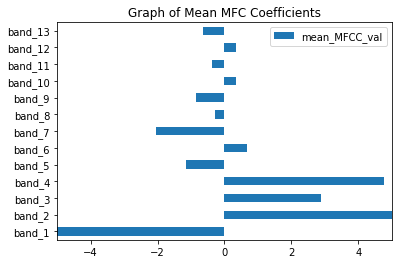

In [53]:
mean_coef_df.plot.barh()
plt.xlim(-5, 5)
plt.title('Graph of Mean MFC Coefficients')
plt.show()

## NOTES BELOW